In [1]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from scipy import stats

#import seaborn as sns
import sys
import scipy
sys.path.append('External_Functions')
from ExternalFunctions import Chi2Regression
from ExternalFunctions import nice_string_output, add_text_to_ax 

from sympy import *
import random
import math

import matplotlib as mpl
mpl.rcParams['figure.figsize']   = (18,10)
mpl.rcParams['font.size']        = 20 # standard er 45
mpl.rcParams['lines.color']      = 'r'
mpl.rcParams['lines.markersize'] = 20
plt.rcParams['figure.constrained_layout.use'] = True

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 25.65                      │        Ncalls = 81 (81 total)        │
│ EDM = 7.29e-07 (Goal: 0.0002)    │               up = 1.0               │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
<ArgsView of Minuit at 55f57c21c560>
  3820.179889987915
  5.010114131586188
  0.08159552881415309
FWHM= 0.19174949271325978


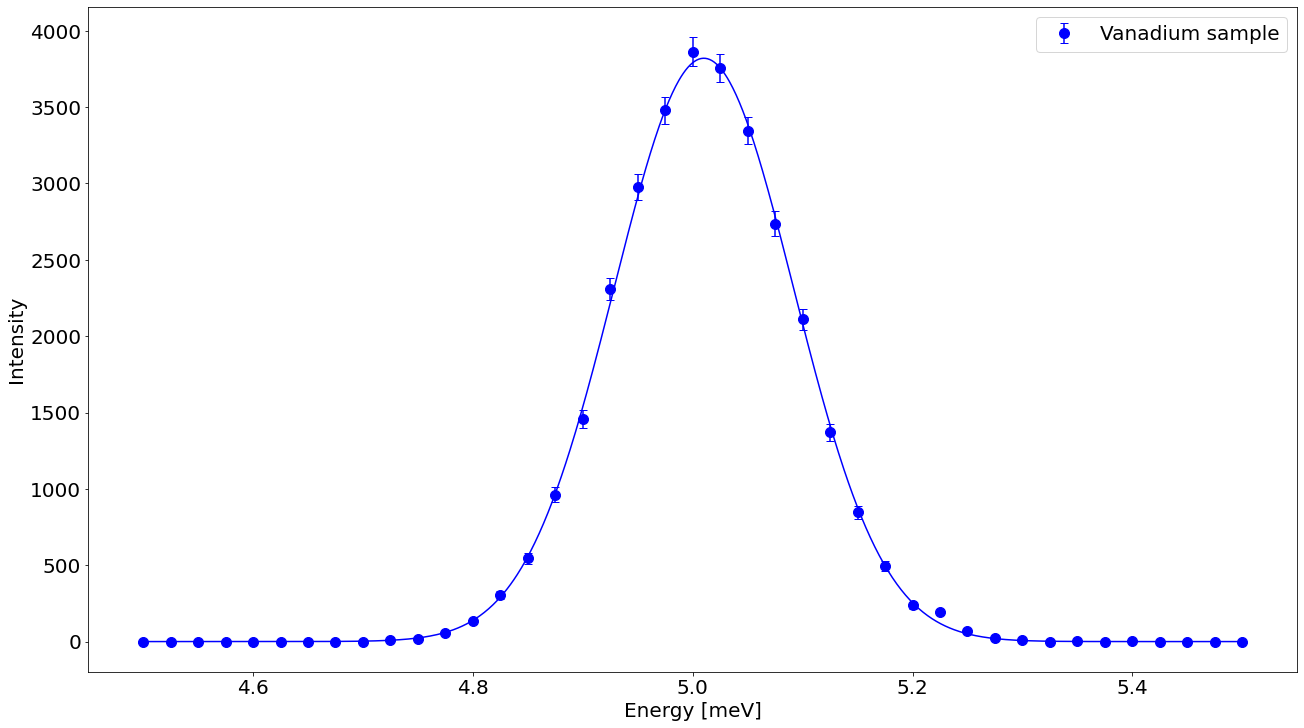

In [2]:
data_vana = np.loadtxt('ThALES_double_peak12_vanadium_good/mccode.dat')

E = []

for i in range(len(data_vana)):
    E.append(data_vana[i][0])
    
intensity = []

for i in range(len(data_vana)):
    intensity.append(data_vana[i][7])
    
error = []

for i in range(len(data_vana)):
    error.append(data_vana[i][8])

def gauss(x,a,mu,sigma):
    return  a*np.exp(-(x-mu)** 2 / (2*sigma**2))

intensity= np.array(intensity)
E = np.array(E)
error = np.array(error)

chi2fitvana = Chi2Regression(gauss, E[intensity>1], intensity[intensity>1], error[intensity>1]) # Chi**2 fit to the histograms excluding the empty bins.
minuitvana = Minuit(chi2fitvana, pedantic=False, a=4000, mu=5, sigma=0.1,print_level=1) 
minuitvana.migrad();
fit_parametersvana = minuitvana.args
fit_errorsvana = minuitvana.errors
Chi2_vana = minuitvana.fval

print(fit_parametersvana)

print('FWHM=',2.35*fit_parametersvana[2])
    
x_range = np.linspace(np.min(E), np.max(E),1000)
    
plt.errorbar(E, intensity, error, fmt='b.', capsize=4, label='Vanadium sample')
plt.plot(x_range, gauss(x_range, *fit_parametersvana),'b')
plt.ylabel('Intensity')
plt.xlabel('Energy [meV]')
plt.legend()